In [1]:
import pandas as pd
from config import ENERGI_STYRELSEN_DIR

In [2]:
data = pd.read_excel(ENERGI_STYRELSEN_DIR / "data.xlsx")

In [3]:
len(data)

152439

In [4]:
data.head()

,Objekttype,GSRN,Nettilslutningsdato,Installeret effekt,Etableringstype (kun solceller),Hemmelig ejer,Hemmelig lejer,Id,StreetName,StreetCode,...,Floor,Room,CitySubDivision,PostalCode,PostOfficeBox,City,MunicipalityCode,CountryCode,Comment,PublicRegistryId (DAR-ID)
0,Solcelle,'571313179104470920,2024-03-07,12.00,Tag,NaN,NaN,2D322B49-E608-4FDB-85F6-4B2A287D6785,Riggervej,NaN,...,NaN,NaN,NaN,2660.0,NaN,Brøndby Strand,NaN,DK,NaN,NaN
1,Solcelle,'571313174002868107,2024-03-07,3.00,Tag,NaN,NaN,DEDCA129-60CA-4029-A445-024C85B03A9C,Gudmindrup Strandvej,NaN,...,NaN,NaN,Gudmindrup Lyng,4573.0,NaN,Højby,NaN,DK,NaN,NaN
2,Solcelle,'571313154390777090,2024-03-07,10.00,Tag,NaN,NaN,291598FD-D8D0-449A-8839-7B4E5F31FC61,Rønnevej,NaN,...,NaN,NaN,NaN,5580.0,NaN,Nørre Aaby,NaN,DK,NaN,NaN
3,Solcelle,'571313179104470173,2024-03-07,1.00,Tag,NaN,NaN,0F09DA55-C834-4AE2-8EE0-57C330B893E5,Rødkløvervej,NaN,...,NaN,NaN,NaN,2400.0,NaN,København NV,NaN,DK,NaN,NaN
4,Solcelle,'571313179104471644,2024-03-07,7.74,Tag,NaN,NaN,325F86D5-5A6D-4B7C-B14C-CF2A0B4ED06F,Bluevang Alle,NaN,...,NaN,NaN,NaN,2610.0,NaN,Rødovre,NaN,DK,NaN,NaN


In [5]:
# Nettilslutningsdato is a date
data["Nettilslutningsdato"] = pd.to_datetime(
    data["Nettilslutningsdato"], errors="coerce"
)

In [6]:
data.dtypes

Objekttype                                 object
GSRN                                       object
Nettilslutningsdato                datetime64[ns]
Installeret effekt                        float64
Etableringstype (kun solceller)            object
Hemmelig ejer                             float64
Hemmelig lejer                            float64
Id                                         object
StreetName                                 object
StreetCode                                float64
HouseNumber                                object
Floor                                      object
Room                                       object
CitySubDivision                            object
PostalCode                                float64
PostOfficeBox                             float64
City                                       object
MunicipalityCode                          float64
CountryCode                                object
Comment                                   float64


In [7]:
# count Objekttype
data["Objekttype"].value_counts()

Objekttype
Solcelle                   145997
Enkeltstående vindmølle      3359
Husstandsvindmølle           2184
Værk                          652
Vindmøllepark                 247
Name: count, dtype: int64

In [8]:
# Etableringstype (kun solceller)
print(data["Etableringstype (kun solceller)"].value_counts(dropna=False).to_latex())

\begin{tabular}{lr}
\toprule
 & count \\
Etableringstype (kun solceller) &  \\
\midrule
NaN & 133052 \\
Tag & 19200 \\
Jord & 108 \\
Integreret & 79 \\
\bottomrule
\end{tabular}



In [9]:
print(data["Objekttype"].value_counts(dropna=False).to_latex())

\begin{tabular}{lr}
\toprule
 & count \\
Objekttype &  \\
\midrule
Solcelle & 145997 \\
Enkeltstående vindmølle & 3359 \\
Husstandsvindmølle & 2184 \\
Værk & 652 \\
Vindmøllepark & 247 \\
\bottomrule
\end{tabular}



<Axes: >

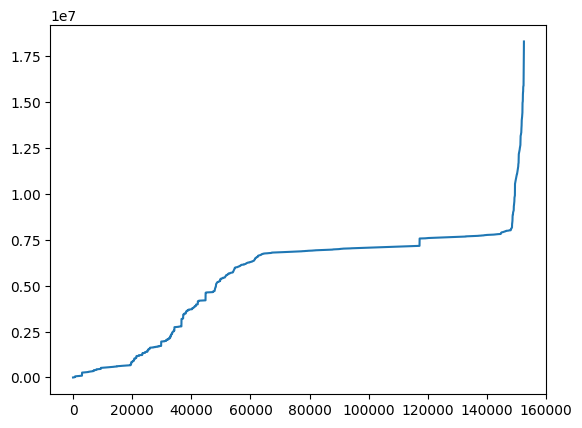

In [10]:
# cumulative plot of Installeret effekt
data["Installeret effekt"].cumsum().plot()

<Axes: xlabel='Nettilslutningsdato'>

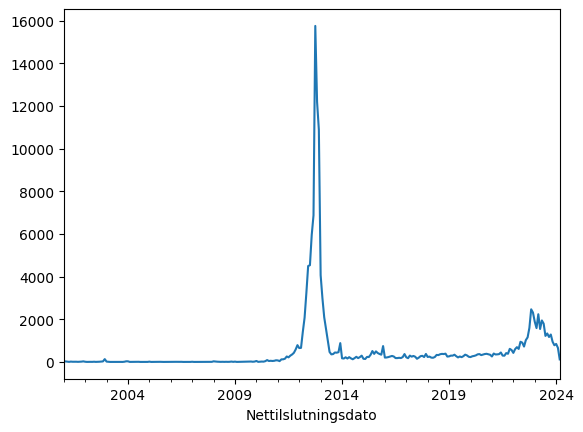

In [11]:
# count of entries in Nettilslutningsdato for each month where the date is greater than 2000
data[data["Nettilslutningsdato"].dt.year > 2000]["Nettilslutningsdato"].dt.to_period(
    "M"
).value_counts().sort_index().plot()

In [12]:
# count of entries per "Objekttype" per year
data["year"] = data["Nettilslutningsdato"].dt.year
print(
    data[data["year"] >= 2000]
    .groupby(["year", "Objekttype"])
    .size()
    .unstack()
    .sum()
    .to_latex()
)

\begin{tabular}{lr}
\toprule
 & 0 \\
Objekttype &  \\
\midrule
Enkeltstående vindmølle & 1703.000000 \\
Husstandsvindmølle & 2113.000000 \\
Solcelle & 145957.000000 \\
Vindmøllepark & 76.000000 \\
Værk & 251.000000 \\
\bottomrule
\end{tabular}



In [13]:
# print index 2159
data.loc[2159]

Objekttype                                                         Værk
GSRN                                                '571313113163399082
Nettilslutningsdato                                 2023-12-08 00:00:00
Installeret effekt                                                360.0
Etableringstype (kun solceller)                                     NaN
Hemmelig ejer                                                       0.0
Hemmelig lejer                                                      NaN
Id                                 322038FF-3CE4-4CA8-82A1-D091782E4145
StreetName                                                   Rørdalsvej
StreetCode                                                          NaN
HouseNumber                                                         200
Floor                                                               NaN
Room                                                                NaN
CitySubDivision                                                 

<Axes: xlabel='year'>

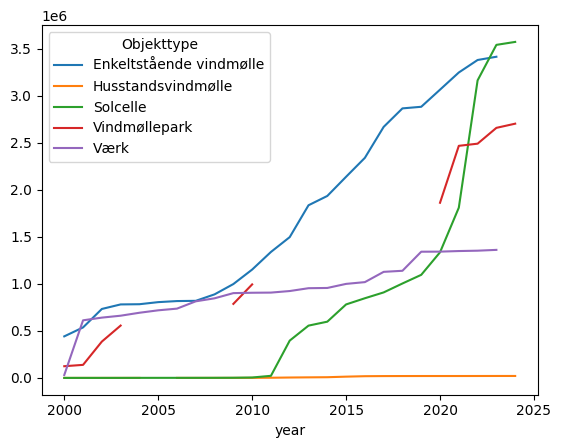

In [16]:
# cumsum plot of "Installeret effekt" for each "Objekttype" from 2000
data[data["year"] >= 2000].groupby(["year", "Objekttype"])[
    "Installeret effekt"
].sum().unstack().cumsum().plot()

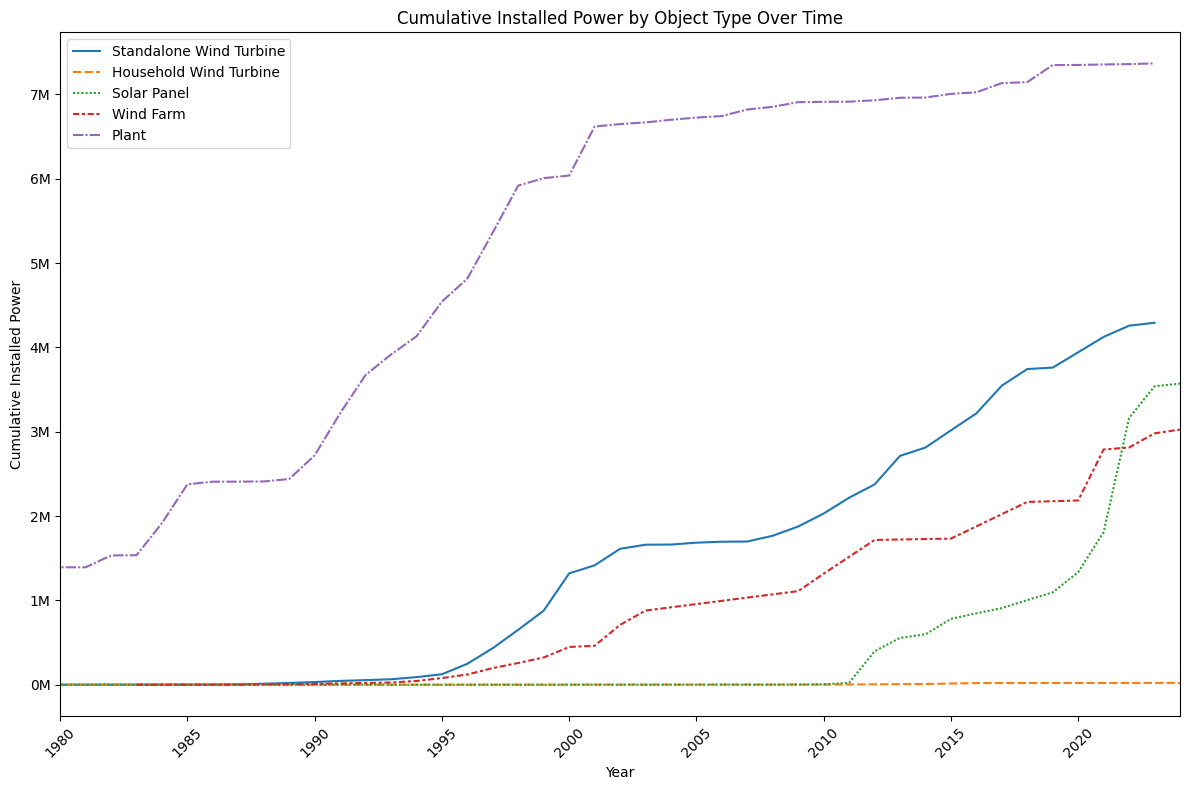

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame with columns ["year", "Objekttype", "Installeret effekt"]
# and that it has already been filtered for years >= 2000 in the prior steps.
# Here, we simulate a small sample of such a DataFrame for demonstration.

# Grouping, summing, and cumulatively summing installed power by year and object type
grouped = (
    data.groupby(["year", "Objekttype"])["Installeret effekt"].sum().unstack().cumsum()
)

translations = {
    "Solcelle": "Solar Panel",
    "Enkeltstående vindmølle": "Standalone Wind Turbine",
    "Husstandsvindmølle": "Household Wind Turbine",
    "Værk": "Plant",
    "Vindmøllepark": "Wind Farm",
}

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped)
plt.xlabel("Year")
plt.ylabel("Cumulative Installed Power")
plt.title("Cumulative Installed Power by Object Type Over Time")
plt.xlim(1980, max(data["year"]))
plt.xticks(rotation=45)

# format the y-axis to show millions
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:.0f}M".format(x / 1e6))
)

# Translate the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
translated_labels = [
    translations[label] if label in translations else label for label in labels
]
plt.legend(handles, translated_labels)

plt.tight_layout()
plt.show()